# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fayza Azzahra
- **Email:** fayzaazz05@gmail.com
- **ID Dicoding:** CDCC204D6X2652


## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda sepanjang tahun 2011–2012?
- Pada jam berapa jumlah penyewaan sepeda paling tinggi dalam sehari selama periode 2011–2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset terdiri dari data penyewaan sepeda dalam skala harian (731 baris) dan per jam (17.379 baris).
- Variabel yang tersedia meliputi musim, suhu, kelembaban, kecepatan angin, kondisi cuaca, serta jumlah penyewaan (casual, registered, dan total/cnt).
- Dataset mencakup periode waktu selama tahun 2011 hingga 2012.

### Assessing Data

Data Set Harian

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
day_df.duplicated().sum()

np.int64(0)

Data Set Per Jam

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
hour_df.duplicated().sum()

np.int64(0)

**Insight:**
- Tidak ditemukan missing value pada seluruh kolom dataset.
- Tidak terdapat data duplikat pada dataset harian maupun per jam
- Tipe data sebagian besar sudah sesuai, namun kolom dteday masih bertipe object sehingga perlu dikonversi menjadi datetime.

### Cleaning Data

In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

season_map = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

weather_map = {
    1: "Clear",
    2: "Mist",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Snow"
}

day_df['season'] = day_df['season'].map(season_map)
hour_df['season'] = hour_df['season'].map(season_map)

day_df['weathersit'] = day_df['weathersit'].map(weather_map)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_map)

**Insight:**
- Kolom tanggal berhasil dikonversi ke format datetime sehingga memudahkan analisis berbasis waktu.
- Variabel kategorikal seperti season dan weathersit telah diubah menjadi label deskriptif sehingga visualisasi menjadi lebih informatif dan mudah dipahami.

## Exploratory Data Analysis (EDA)

### Explore Data Harian

In [11]:
day_df.describe()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,6.519836,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,4.000000,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,7.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,10.000000,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [12]:
day_df.groupby("weathersit")["cnt"].mean().sort_values(ascending=False)

,cnt
weathersit,
Clear,4876.786177
Mist,4035.862348
Light Snow/Rain,1803.285714


In [13]:
hour_df.groupby("hr")["cnt"].mean()

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


**Insight:**
- Rata-rata jumlah penyewaan sepeda tertinggi terjadi pada kondisi cuaca Clear, sedangkan kondisi Light Snow/Rain memiliki rata-rata penyewaan terendah.
- Pola penyewaan sepeda menunjukkan variasi yang signifikan berdasarkan jam dalam sehari, dengan adanya jam-jam tertentu yang memiliki lonjakan jumlah pengguna.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda sepanjang tahun 2011–2012?

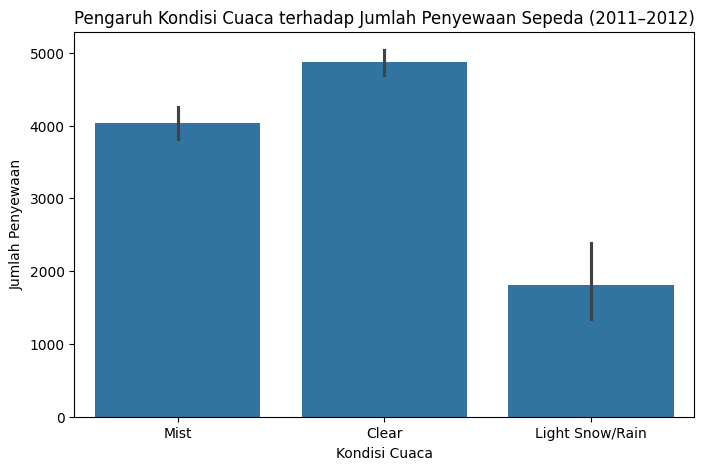

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x='weathersit', y='cnt', data=day_df)
plt.title("Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda (2011–2012)")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.show()

### Pertanyaan 2: Pada jam berapa jumlah penyewaan sepeda paling tinggi dalam sehari selama periode 2011–2012?

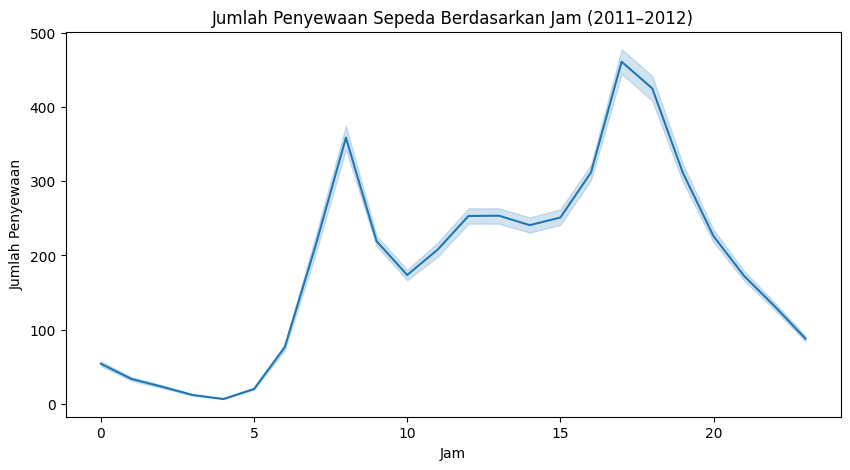

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(x='hr', y='cnt', data=hour_df)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Jam (2011–2012)")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight:**
- Penyewaan sepeda tertinggi terjadi pada kondisi cuaca Clear dengan rata-rata jumlah penyewaan paling besar dibandingkan kondisi cuaca lainnya.
- Terdapat dua puncak utama penyewaan sepeda dalam sehari:
1. Pagi hari sekitar pukul 08.00.
2. Sore hari sekitar pukul 17.00–18.00.
- Pola ini menunjukkan bahwa sepeda banyak digunakan untuk aktivitas commuting seperti berangkat dan pulang kerja.

## Analisis Lanjutan (Opsional)

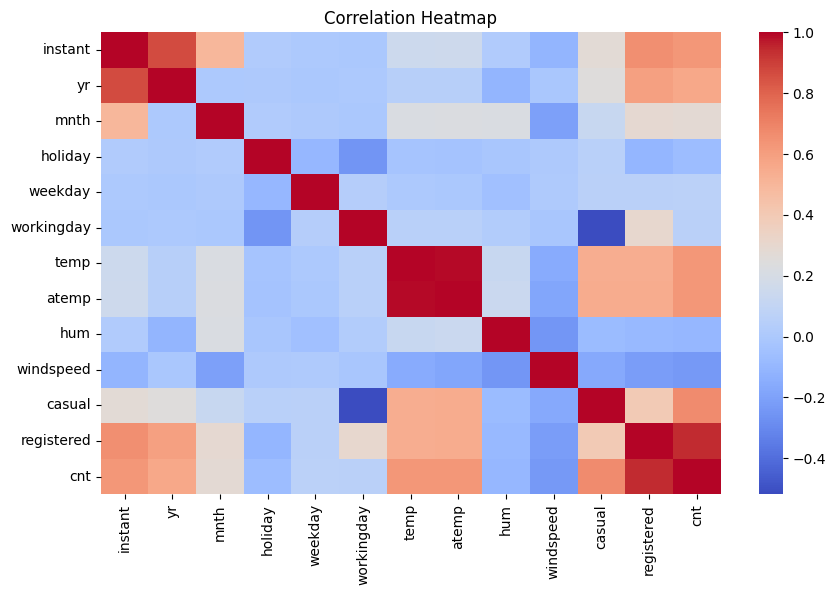

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(day_df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Insight:**
- Variabel suhu (temp dan atemp) memiliki korelasi positif terhadap jumlah penyewaan sepeda, yang menunjukkan bahwa semakin hangat suhu maka semakin tinggi penggunaan sepeda.
- Variabel kelembaban (hum) memiliki korelasi negatif terhadap jumlah penyewaan sepeda, yang berarti kelembaban tinggi cenderung menurunkan jumlah pengguna.
- Kecepatan angin memiliki korelasi negatif yang lemah terhadap jumlah penyewaan.

## Conclusion

- **Conclusion Pertanyaan 1:**
Kondisi cuaca berpengaruh terhadap jumlah penyewaan sepeda sepanjang tahun 2011–2012. Cuaca cerah menghasilkan jumlah penyewaan tertinggi, sedangkan kondisi cuaca buruk seperti hujan atau salju menyebabkan penurunan jumlah penyewaan secara signifikan.

- **Conclusion Pertanyaan 2:**
- Jumlah penyewaan sepeda paling tinggi terjadi pada jam sibuk yaitu pukul 08.00 serta pukul 17.00–18.00. Pola ini berkaitan dengan aktivitas mobilitas masyarakat pada jam berangkat dan pulang kerja.

**Rekomendasi**
1. Penyedia layanan dapat menambah ketersediaan sepeda pada jam sibuk (08.00 dan 17.00–18.00) untuk meningkatkan kepuasan pengguna.
2. Strategi promosi seperti diskon atau insentif dapat diberikan saat kondisi cuaca kurang baik untuk menjaga jumlah pengguna.
3. Perawatan sepeda sebaiknya dijadwalkan di luar jam sibuk agar tidak mengganggu operasional layanan.
4. Informasi prediksi cuaca dapat dimanfaatkan untuk perencanaan operasional dan distribusi sepeda yang lebih optimal.